In [1]:
library(tidyverse)
tree_data <- read_csv("Sx.htdata.csv")
 
library(repr)

sxData <- tree_data |>
mutate(
    TX_MAP = S_MAP -P_MAP,
    TX_MSP = S_MSP -P_MSP,
    TX_MCMT = S_MCMT - P_MCMT,
    TX_MAT = S_MAT - P_MAT,
    TX_Lat = S_Latitude - P_Latitude,
    TX_Long = S_Longitude - P_Longitude,
    TX_Elev = S_Elevation - P_Elevation
) 
head(sxData)

sxData |>
filter(PROV %in% c(34, 40, 63)) |>
select(PROV, P_Latitude, P_Longitude, P_Elevation) |>
unique()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 3240 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): SITE
dbl (19): PROV, BLOCK, TREE, S_MAT, S_MCMT, S_MAP, S_MSP, S_Latitude, S_Long...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


SITE,PROV,BLOCK,TREE,S_MAT,S_MCMT,S_MAP,S_MSP,S_Latitude,S_Longitude,⋯,P_Longitude,Height,live,TX_MAP,TX_MSP,TX_MCMT,TX_MAT,TX_Lat,TX_Long,TX_Elev
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MID,1,4,6,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,853.3361,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,3,4,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,827.0951,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,3,9,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,804.8595,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,4,9,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,745.6832,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,4,5,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,832.1914,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,4,1,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,838.4129,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92


PROV,P_Latitude,P_Longitude,P_Elevation
<dbl>,<dbl>,<dbl>,<dbl>
40,54.69117,-127.4027,1005
34,59.18291,-129.7254,792
63,50.07538,-115.0271,1280


In [66]:
sxData |>
select(SITE, S_Latitude, S_Longitude, S_Elevation) |>
unique()

SITE,S_Latitude,S_Longitude,S_Elevation
<chr>,<dbl>,<dbl>,<dbl>
MID,54.19948,-125.002,670
NORTH,59.68500,-129.129,730
SOUTH,49.29546,-117.202,1250


In [50]:
# model <- lm(Height ~ 
#               S_MAT + I(S_MAT^2) +
#               P_MAP + 
#               TX_Lat + 
#               TX_Long,
#               data = sxData)

In [8]:
fcData <- read_csv("CD_34_40_63.csv") |> 
transmute(SSP = SSP,
          SITE = PROV,
          S_MCMT = MCMT,
          S_MAT = MAT,
          S_MAP = MAP,
          S_MSP = MSP,
          S_Lat = Lat,
          S_Long = long,
          S_Elev = elev) 

fcData

sxData2 <- subset(sxData, PROV %in% c(34, 40, 63))
sxData2 <- unique(subset(sxData2, select = c(PROV, P_MAT, P_MCMT, P_MAP, P_MSP, P_Latitude, P_Longitude, P_Elevation)))

fcdat2 <- merge(fcData, sxData2)

head(fcdat2)

Rows: 15 Columns: 270
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): PROV
dbl (269): Lat, long, elev, SSP, MAT, MWMT, MCMT, TD, MAP, MSP, AHM, SHM, DD...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


SSP,SITE,S_MCMT,S_MAT,S_MAP,S_MSP,S_Lat,S_Long,S_Elev
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,N,-15.8,-0.9,483,213,59.18291,-129.7254,792
126,N,-14.9,0.9,630,269,59.18291,-129.7254,792
245,N,-13.8,1.9,649,275,59.18291,-129.7254,792
370,N,-12.7,3.0,667,282,59.18291,-129.7254,792
585,N,-11.9,3.7,697,294,59.18291,-129.7254,792
0,M,-7.9,2.1,1018,314,54.69117,-127.4027,1005
126,M,-8.1,3.7,1183,335,54.69117,-127.4027,1005
245,M,-7.1,4.6,1218,342,54.69117,-127.4027,1005
370,M,-6.3,5.6,1219,341,54.69117,-127.4027,1005


,SSP,SITE,S_MCMT,S_MAT,S_MAP,S_MSP,S_Lat,S_Long,S_Elev,PROV,P_MAT,P_MCMT,P_MAP,P_MSP,P_Latitude,P_Longitude,P_Elevation
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,N,-15.8,-0.9,483,213,59.18291,-129.7254,792,40,1.6,-9.3,723,230,54.69117,-127.4027,1005
2,126,N,-14.9,0.9,630,269,59.18291,-129.7254,792,40,1.6,-9.3,723,230,54.69117,-127.4027,1005
3,245,N,-13.8,1.9,649,275,59.18291,-129.7254,792,40,1.6,-9.3,723,230,54.69117,-127.4027,1005
4,370,N,-12.7,3.0,667,282,59.18291,-129.7254,792,40,1.6,-9.3,723,230,54.69117,-127.4027,1005
5,585,N,-11.9,3.7,697,294,59.18291,-129.7254,792,40,1.6,-9.3,723,230,54.69117,-127.4027,1005
6,0,M,-7.9,2.1,1018,314,54.69117,-127.4027,1005,40,1.6,-9.3,723,230,54.69117,-127.4027,1005


In [9]:
fcdat2 <- fcdat2|>
mutate(
    TX_MAP = S_MAP -P_MAP,
    TX_MSP = S_MSP -P_MSP,
    TX_MCMT = S_MCMT - P_MCMT,
    TX_MAT = S_MAT - P_MAT,
    TX_Lat = S_Lat - P_Latitude,
    TX_Long = S_Long- P_Longitude,
    TX_Elev = S_Elev - P_Elevation)

fcdat2

SSP,SITE,S_MCMT,S_MAT,S_MAP,S_MSP,S_Lat,S_Long,S_Elev,PROV,⋯,P_Latitude,P_Longitude,P_Elevation,TX_MAP,TX_MSP,TX_MCMT,TX_MAT,TX_Lat,TX_Long,TX_Elev
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,N,-15.8,-0.9,483,213,59.18291,-129.7254,792,40,⋯,54.69117,-127.4027,1005,-240,-17,-6.5,-2.5,4.49173763,-2.3227397,-213
126,N,-14.9,0.9,630,269,59.18291,-129.7254,792,40,⋯,54.69117,-127.4027,1005,-93,39,-5.6,-0.7,4.49173763,-2.3227397,-213
245,N,-13.8,1.9,649,275,59.18291,-129.7254,792,40,⋯,54.69117,-127.4027,1005,-74,45,-4.5,0.3,4.49173763,-2.3227397,-213
370,N,-12.7,3.0,667,282,59.18291,-129.7254,792,40,⋯,54.69117,-127.4027,1005,-56,52,-3.4,1.4,4.49173763,-2.3227397,-213
585,N,-11.9,3.7,697,294,59.18291,-129.7254,792,40,⋯,54.69117,-127.4027,1005,-26,64,-2.6,2.1,4.49173763,-2.3227397,-213
0,M,-7.9,2.1,1018,314,54.69117,-127.4027,1005,40,⋯,54.69117,-127.4027,1005,295,84,1.4,0.5,-0.00000237,-0.0000397,0
126,M,-8.1,3.7,1183,335,54.69117,-127.4027,1005,40,⋯,54.69117,-127.4027,1005,460,105,1.2,2.1,-0.00000237,-0.0000397,0
245,M,-7.1,4.6,1218,342,54.69117,-127.4027,1005,40,⋯,54.69117,-127.4027,1005,495,112,2.2,3.0,-0.00000237,-0.0000397,0
370,M,-6.3,5.6,1219,341,54.69117,-127.4027,1005,40,⋯,54.69117,-127.4027,1005,496,111,3.0,4.0,-0.00000237,-0.0000397,0


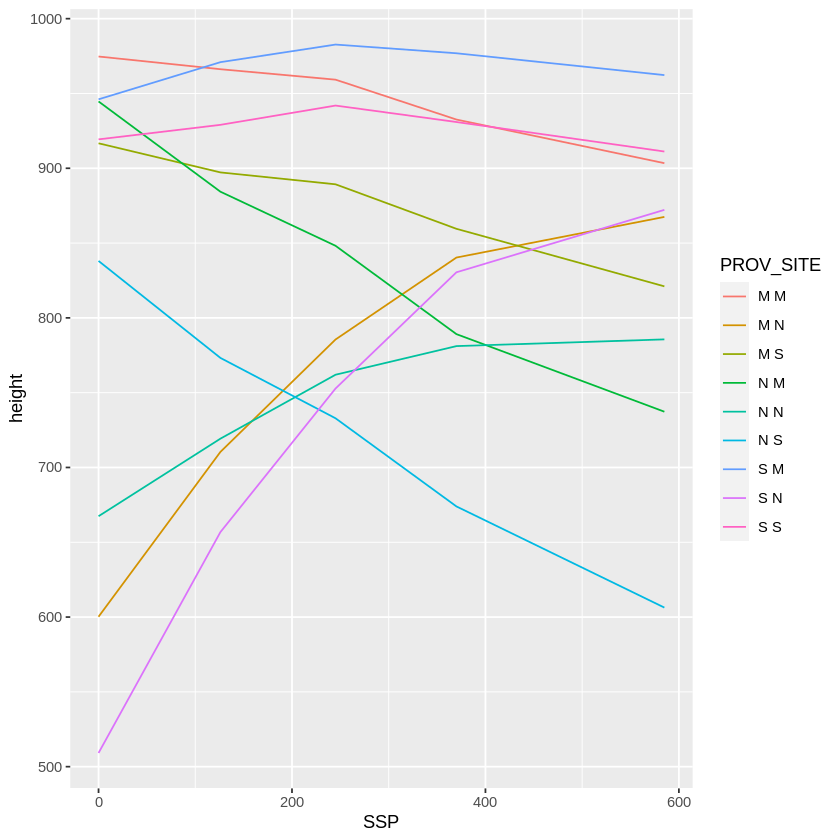

In [65]:
model.1 <- lm(Height ~ 
              S_MAT + 
              P_MAP + 
              TX_Lat + 
              TX_Long,
              data = sxData)
# R-squared: 0.8358   standard error: 145.1

model.2 <- lm(Height ~ 
              S_MAT + I(S_MAT^2) +
              P_MAP + 
              TX_Lat + 
              TX_Long,
              data = sxData)
# R-squared: 0.8409   standard error: 14

model.3 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) +
              S_MAP + I(S_MAP^2) +
              TX_Lat + I(TX_Lat^2) +
              TX_Long,
              data = sxData)
# R-squared: 0.8709   standard error: 128.7

model.4 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) +
              S_MAP + I(S_MAP^2) +
              I(TX_Lat^2) +
              TX_Long,
              data = sxData)
# R-squared: 0.8708   standard error: 128.8

model.5 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) + 
              S_MAP + I(S_MAP^2), 
              data = sxData)
# R-squared: 0.8428   standard error: 142

model.6 <- lm(Height ~ 
              TX_MCMT + I(TX_MCMT^2) + 
              S_MAT + I(S_MAT^2), 
              data = sxData)
# R-squared: 0.8411   standard error: 142.8

model.7 <- lm(Height ~ 
              TX_MCMT + I(TX_MCMT^2) + 
              P_MAT + I(P_MAT^2), 
              data = sxData)
# R-squared: 0.8299   standard error: 147.7

model.8 <- lm(Height ~ 
              TX_MAT + I(TX_MAT^2) + 
              S_MCMT + I(S_MCMT^2), 
              data = sxData)



pred_height <- predict(model.8, fcdat2)
pred_table <- tibble (fcdat2$SITE, fcdat2$PROV, fcdat2$SSP, pred_height) |> 
transmute(SITE = as_factor(fcdat2$SITE),
          PROV = fcdat2$PROV, 
          SSP = fcdat2$SSP, 
          height = pred_height) |>
mutate(PROV_FCT = factor(PROV,
                        levels = c(34, 40, 63), 
                        labels = c("N", "M", "S")))




pred_table$PROV_SITE <- paste(pred_table$PROV_FCT,pred_table$SITE)

pred_table |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

In [67]:
# pred_table |>  
# filter(SITE == "N") |>
# ggplot(aes(x=SSP, y=height, color = PROV_FCT)) + geom_line() +
# labs(title = "Move to the North Site")

# pred_table |>  
# filter(SITE == "M") |>
# ggplot(aes(x=SSP, y=height, color = PROV_FCT)) + geom_line() +
# labs(title = "Move to the Middle Site")

# pred_table |>  
# filter(SITE == "S") |>
# ggplot(aes(x=SSP, y=height, color = PROV_FCT)) + geom_line() +
# labs(title = "Move to the South Site")

# pred_table |>  
# filter(PROV_FCT == "N") |>
# ggplot(aes(x=SSP, y=height, color = SITE)) + geom_line() +
# labs(title = "Move from the North Site")

# pred_table |>  
# filter(PROV_FCT == "M") |>
# ggplot(aes(x=SSP, y=height, color = SITE)) + geom_line() +
# labs(title = "Move to the Middle Site")

# pred_table |>  
# filter(PROV_FCT == "S") |>
# ggplot(aes(x=SSP, y=height, color = SITE)) + geom_line() +
# labs(title = "Move to the South Site")

Rows: 18 Columns: 271
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): PROV
dbl (270): GCM, Lat, long, elev, SSP, MAT, MWMT, MCMT, TD, MAP, MSP, AHM, SH...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


SITE,PROV,SSP,GCM,height,PROV_FCT,PROV_SITE
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
N,40,0,8,304.6975,M,M N
N,40,126,8,527.0282,M,M N
N,40,585,8,897.5793,M,M N
M,40,0,8,993.5303,M,M M
M,40,126,8,1166.4542,M,M M
M,40,585,8,1487.5985,M,M M


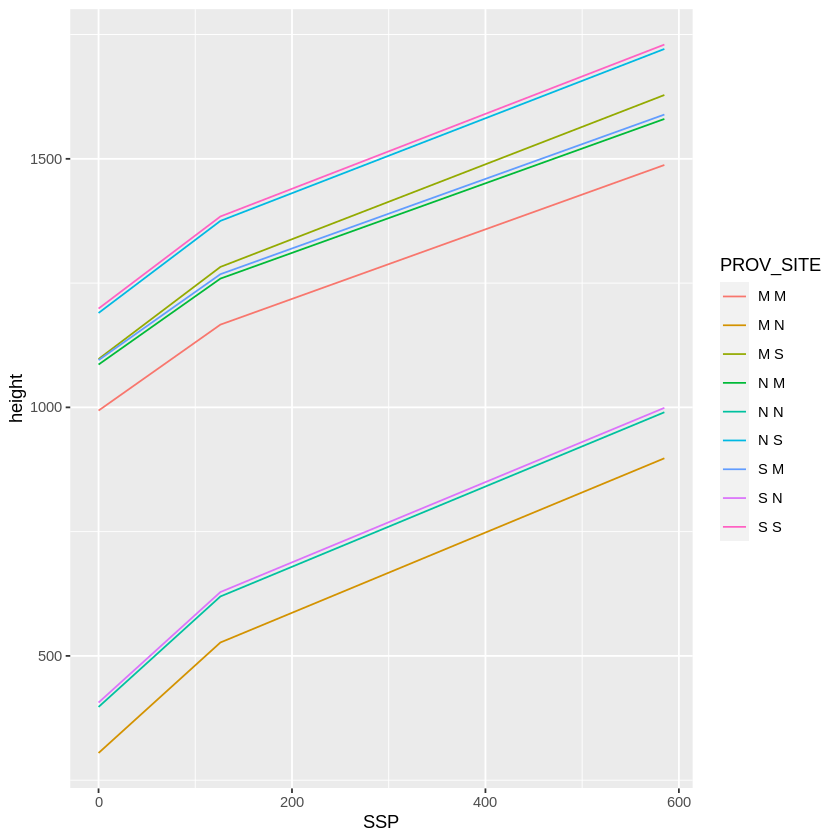

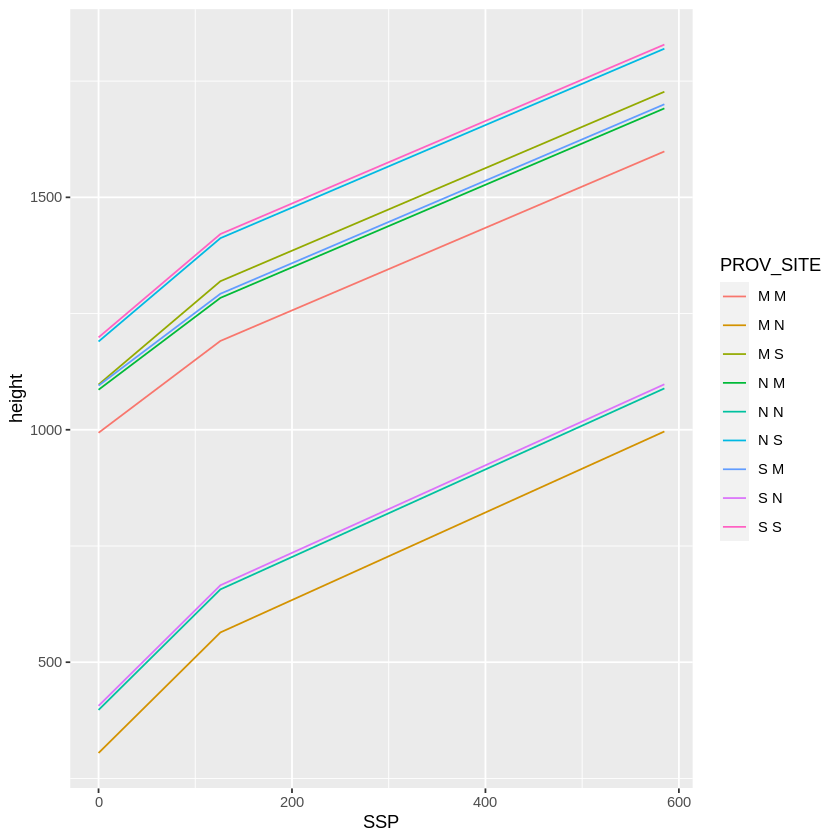

In [86]:
fcData <- read_csv("CD_N_M_S.csv") |> 
transmute(SSP = SSP,
          SITE = PROV,
          S_MCMT = MCMT,
          S_MAT = MAT,
          S_MAP = MAP,
          S_MSP = MSP,
          S_Lat = Lat,
          S_Long = long,
          S_Elev = elev,
         GCM = GCM) 

sxData2 <- subset(sxData, PROV %in% c(34, 40, 63))
sxData2 <- unique(subset(sxData2, select = c(PROV, P_MAT, P_MCMT, P_MAP, P_MSP, P_Latitude, P_Longitude, P_Elevation)))
fcdat2 <- merge(fcData, sxData2)

fcdat2 <- fcdat2|>
mutate(
    TX_MAP = S_MAP -P_MAP,
    TX_MSP = S_MSP -P_MSP,
    TX_MCMT = S_MCMT - P_MCMT,
    TX_MAT = S_MAT - P_MAT,
    TX_Lat = S_Lat - P_Latitude,
    TX_Long = S_Long- P_Longitude,
    TX_Elev = S_Elev - P_Elevation)


model.1 <- lm(Height ~ 
              S_MAT + 
              P_MAP + 
              TX_Lat + 
              TX_Long,
              data = sxData)
# R-squared: 0.8358   standard error: 145.1

model.2 <- lm(Height ~ 
              S_MAT + I(S_MAT^2) +
              P_MAP + 
              TX_Lat + 
              TX_Long,
              data = sxData)
# R-squared: 0.8409   standard error: 14

model.3 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) +
              S_MAP + I(S_MAP^2) +
              TX_Lat + I(TX_Lat^2) +
              TX_Long,
              data = sxData)
# R-squared: 0.8709   standard error: 128.7

model.4 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) +
              S_MAP + I(S_MAP^2) +
              I(TX_Lat^2) +
              TX_Long,
              data = sxData)
# R-squared: 0.8708   standard error: 128.8

model.5 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) + 
              S_MAP + I(S_MAP^2), 
              data = sxData)
# R-squared: 0.8428   standard error: 142

model.6 <- lm(Height ~ 
              TX_MCMT + I(TX_MCMT^2) + 
              S_MAT + I(S_MAT^2), 
              data = sxData)
# R-squared: 0.8411   standard error: 142.8

model.7 <- lm(Height ~ 
              TX_MCMT + I(TX_MCMT^2) + 
              P_MAT + I(P_MAT^2), 
              data = sxData)
# R-squared: 0.8299   standard error: 147.7

model.8 <- lm(Height ~ 
              TX_MAT + I(TX_MAT^2) + 
              S_MCMT + I(S_MCMT^2), 
              data = sxData)



pred_height <- predict(model.1, fcdat2)
pred_table <- tibble (fcdat2$SITE, fcdat2$PROV, fcdat2$SSP, fcdat2$GCM, pred_height) |> 
transmute(SITE = as_factor(fcdat2$SITE),
          PROV = fcdat2$PROV, 
          SSP = fcdat2$SSP, 
          GCM = fcdat2$GCM,
          height = pred_height) |>
mutate(PROV_FCT = factor(PROV,
                        levels = c(34, 40, 63), 
                        labels = c("N", "M", "S")))




pred_table$PROV_SITE <- paste(pred_table$PROV_FCT,pred_table$SITE)

head(pred_table)


pred_table |> 
filter(GCM == 8) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

pred_table |> 
filter(GCM == 13) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

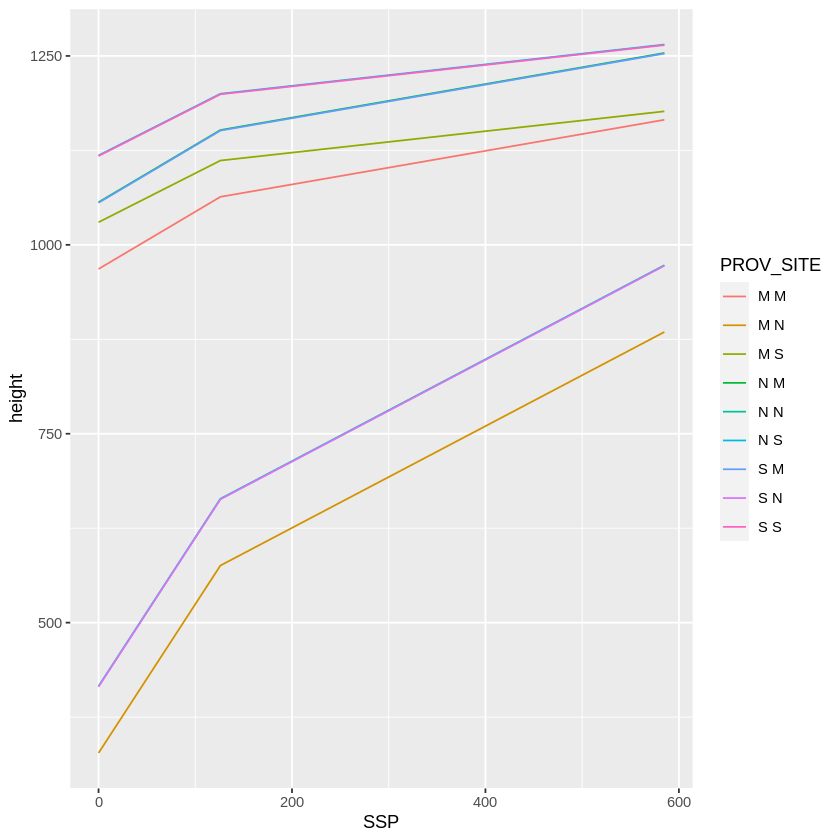

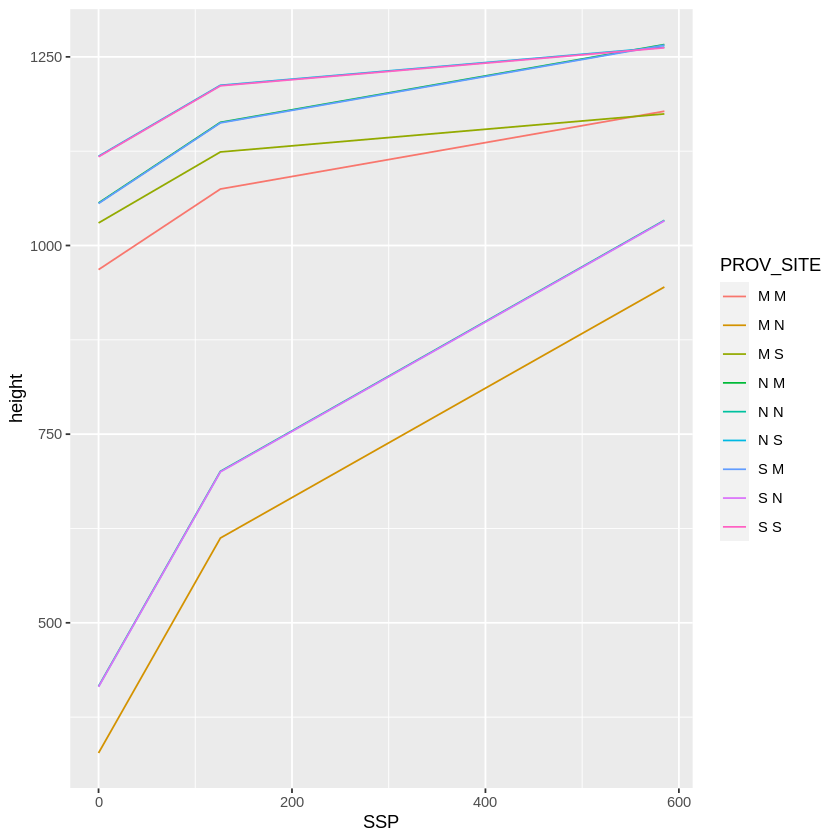

In [89]:
pred_height <- predict(model.2, fcdat2)
pred_table <- tibble (fcdat2$SITE, fcdat2$PROV, fcdat2$SSP, fcdat2$GCM, pred_height) |> 
transmute(SITE = as_factor(fcdat2$SITE),
          PROV = fcdat2$PROV, 
          SSP = fcdat2$SSP, 
          GCM = fcdat2$GCM,
          height = pred_height) |>
mutate(PROV_FCT = factor(PROV,
                        levels = c(34, 40, 63), 
                        labels = c("N", "M", "S")))




pred_table$PROV_SITE <- paste(pred_table$PROV_FCT,pred_table$SITE)


pred_table |> 
filter(GCM == 8) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

pred_table |> 
filter(GCM == 13) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

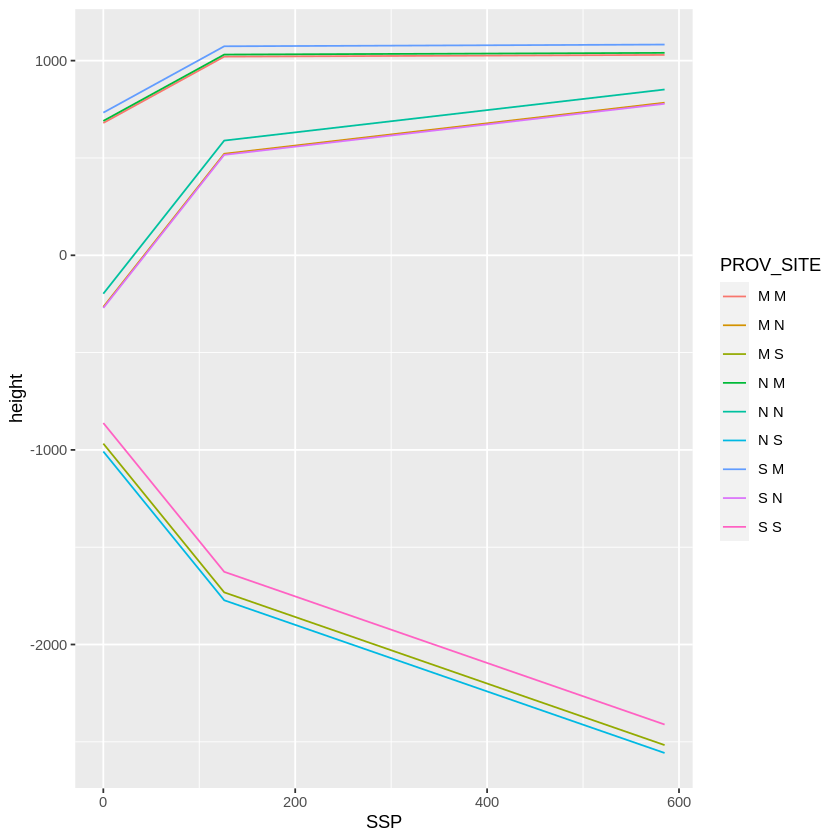

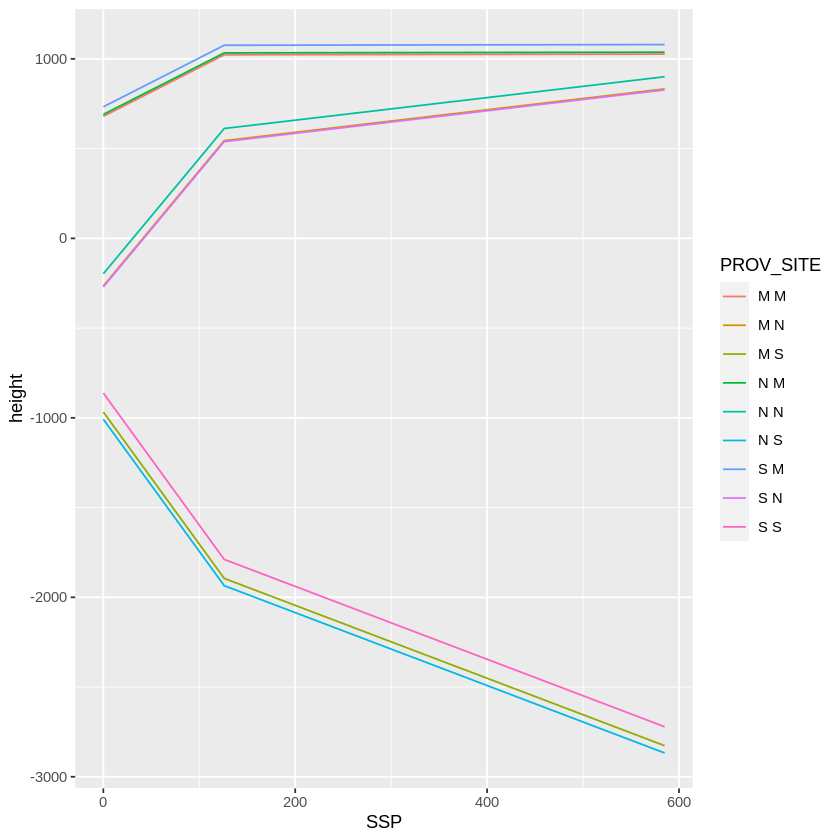

In [92]:
pred_height <- predict(model.3, fcdat2)
pred_table <- tibble (fcdat2$SITE, fcdat2$PROV, fcdat2$SSP, fcdat2$GCM, pred_height) |> 
transmute(SITE = as_factor(fcdat2$SITE),
          PROV = fcdat2$PROV, 
          SSP = fcdat2$SSP, 
          GCM = fcdat2$GCM,
          height = pred_height) |>
mutate(PROV_FCT = factor(PROV,
                        levels = c(34, 40, 63), 
                        labels = c("N", "M", "S")))




pred_table$PROV_SITE <- paste(pred_table$PROV_FCT,pred_table$SITE)


pred_table |> 
filter(GCM == 8) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

pred_table |> 
filter(GCM == 13) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

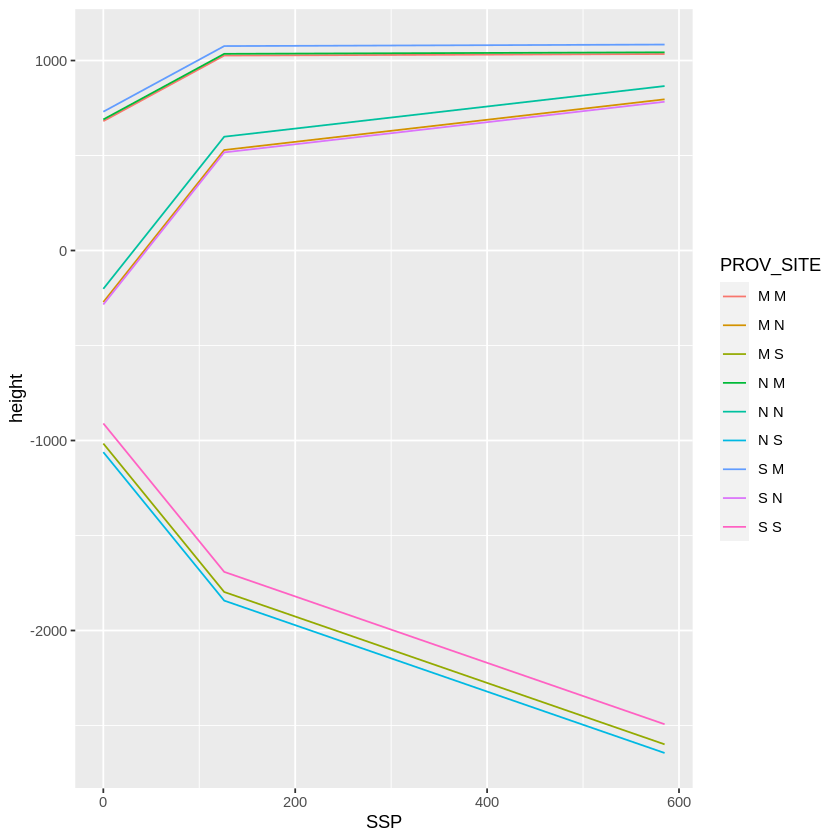

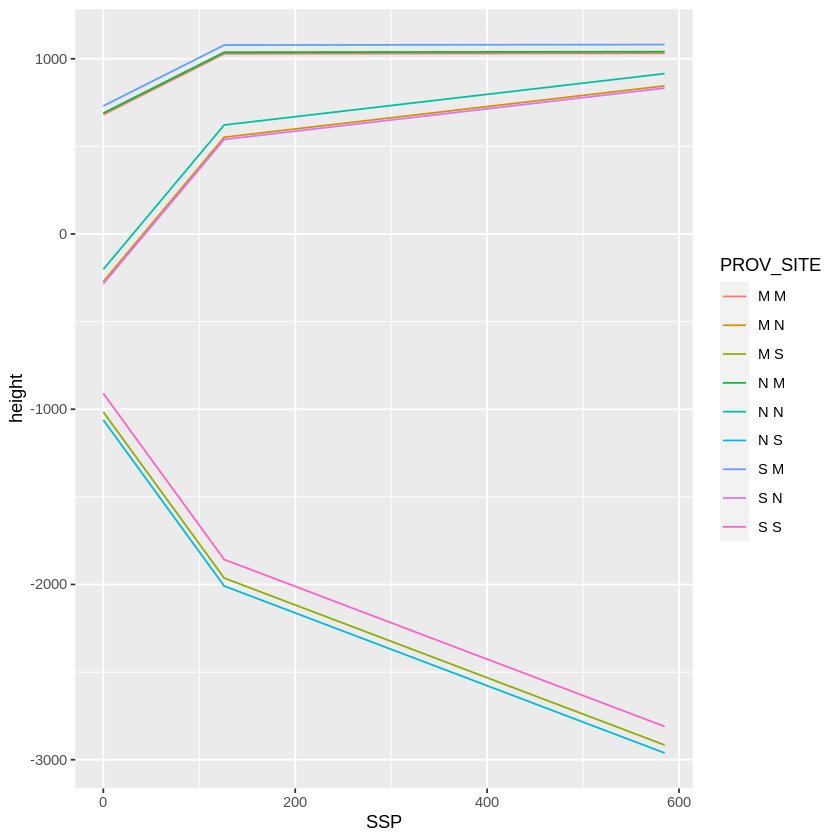

In [91]:
pred_height <- predict(model.4, fcdat2)
pred_table <- tibble (fcdat2$SITE, fcdat2$PROV, fcdat2$SSP, fcdat2$GCM, pred_height) |> 
transmute(SITE = as_factor(fcdat2$SITE),
          PROV = fcdat2$PROV, 
          SSP = fcdat2$SSP, 
          GCM = fcdat2$GCM,
          height = pred_height) |>
mutate(PROV_FCT = factor(PROV,
                        levels = c(34, 40, 63), 
                        labels = c("N", "M", "S")))




pred_table$PROV_SITE <- paste(pred_table$PROV_FCT,pred_table$SITE)


pred_table |> 
filter(GCM == 8) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

pred_table |> 
filter(GCM == 13) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

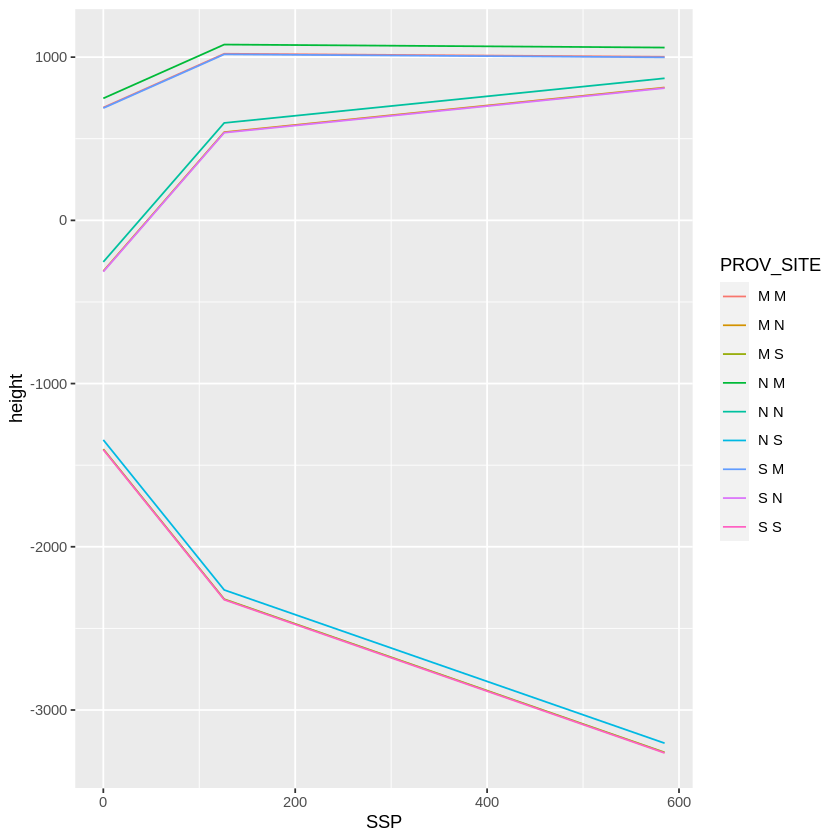

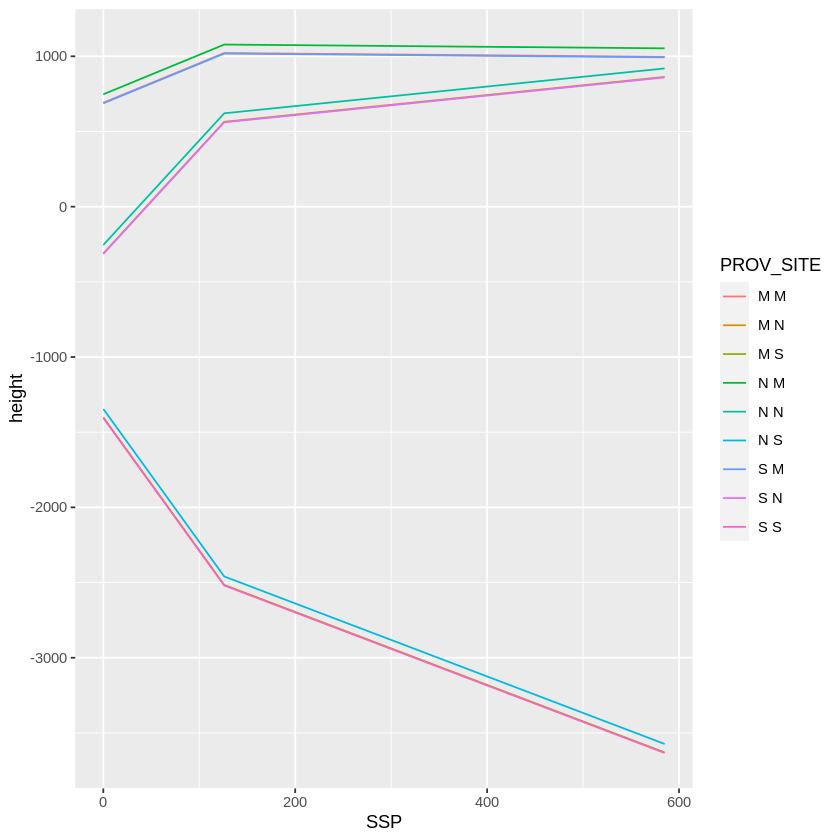

In [93]:
pred_height <- predict(model.5, fcdat2)
pred_table <- tibble (fcdat2$SITE, fcdat2$PROV, fcdat2$SSP, fcdat2$GCM, pred_height) |> 
transmute(SITE = as_factor(fcdat2$SITE),
          PROV = fcdat2$PROV, 
          SSP = fcdat2$SSP, 
          GCM = fcdat2$GCM,
          height = pred_height) |>
mutate(PROV_FCT = factor(PROV,
                        levels = c(34, 40, 63), 
                        labels = c("N", "M", "S")))




pred_table$PROV_SITE <- paste(pred_table$PROV_FCT,pred_table$SITE)


pred_table |> 
filter(GCM == 8) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

pred_table |> 
filter(GCM == 13) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

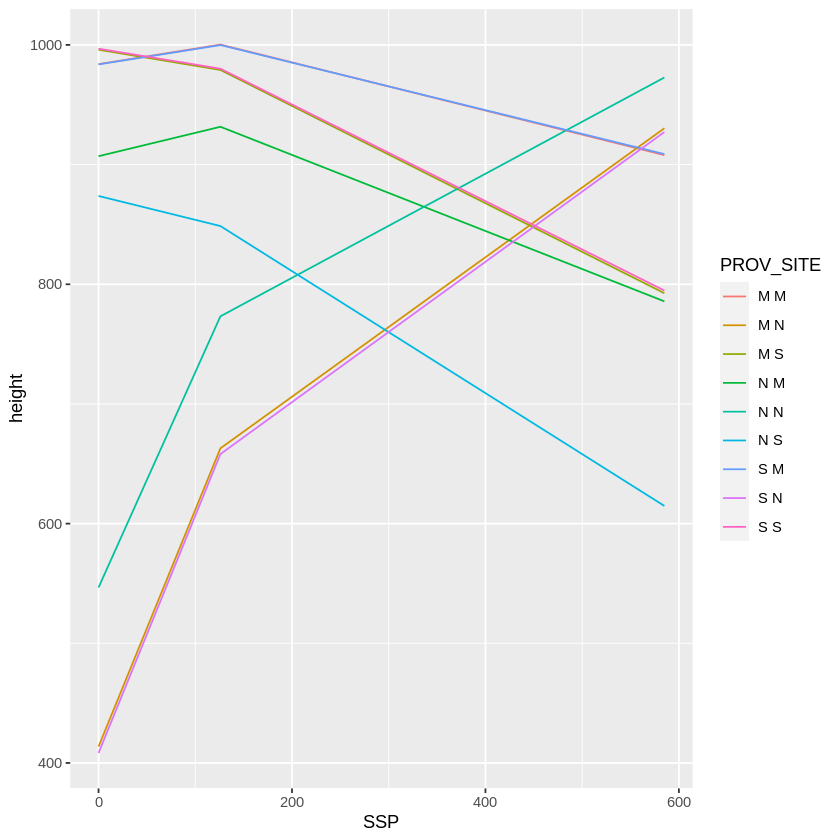

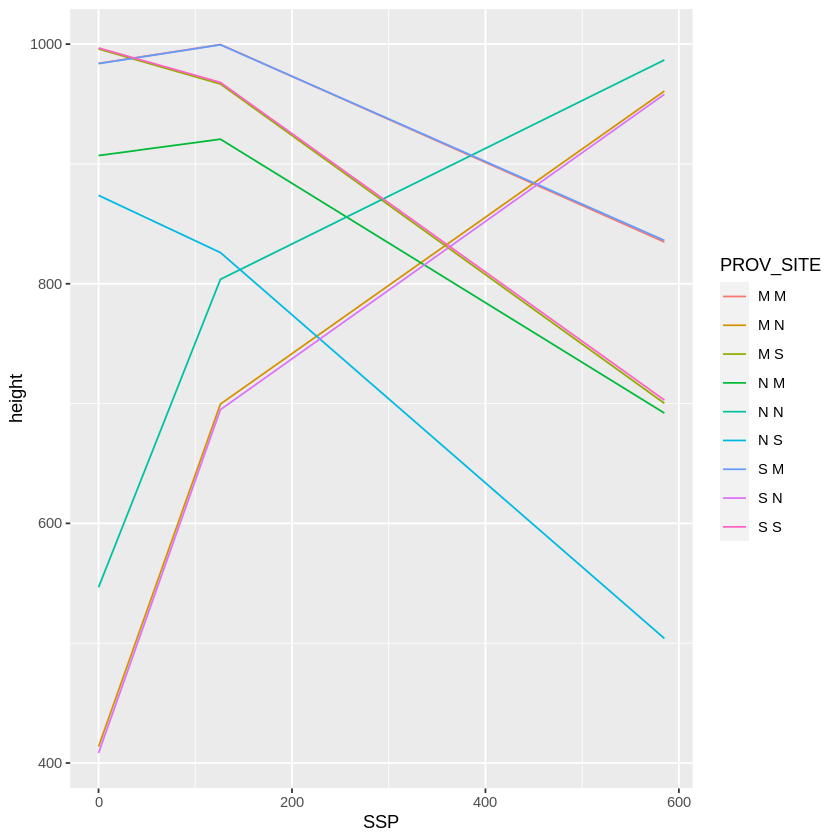

In [94]:
pred_height <- predict(model.6, fcdat2)
pred_table <- tibble (fcdat2$SITE, fcdat2$PROV, fcdat2$SSP, fcdat2$GCM, pred_height) |> 
transmute(SITE = as_factor(fcdat2$SITE),
          PROV = fcdat2$PROV, 
          SSP = fcdat2$SSP, 
          GCM = fcdat2$GCM,
          height = pred_height) |>
mutate(PROV_FCT = factor(PROV,
                        levels = c(34, 40, 63), 
                        labels = c("N", "M", "S")))




pred_table$PROV_SITE <- paste(pred_table$PROV_FCT,pred_table$SITE)


pred_table |> 
filter(GCM == 8) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

pred_table |> 
filter(GCM == 13) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

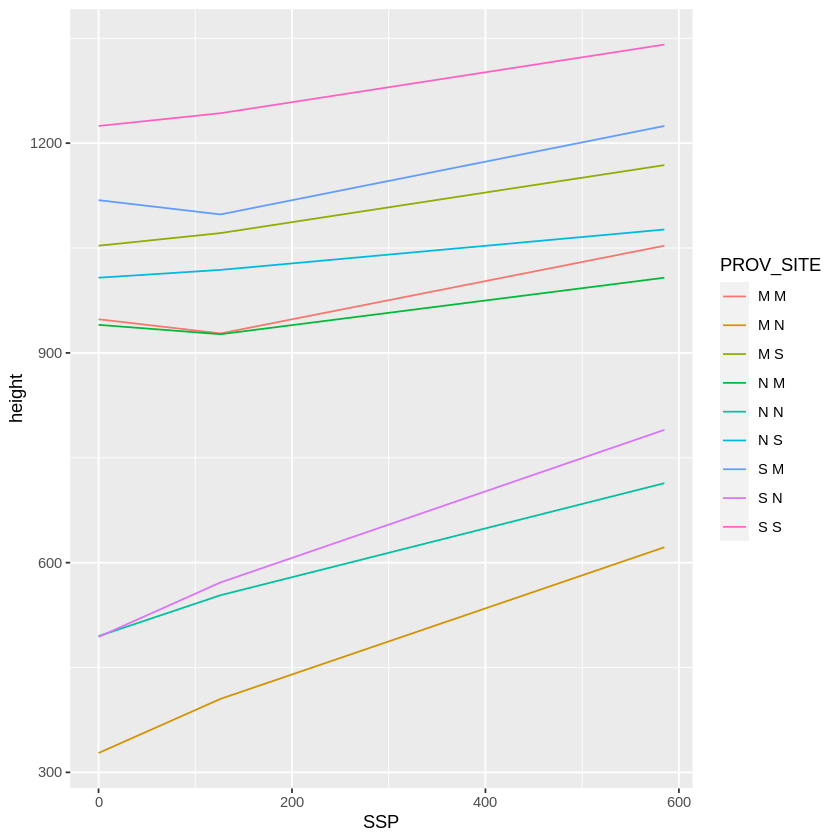

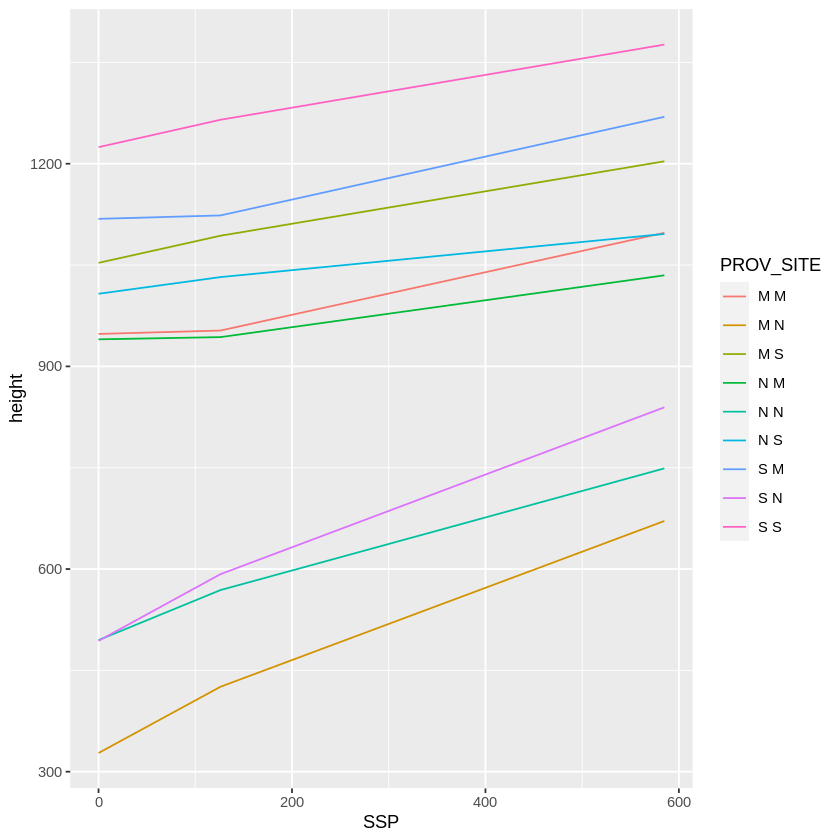

In [95]:
pred_height <- predict(model.7, fcdat2)
pred_table <- tibble (fcdat2$SITE, fcdat2$PROV, fcdat2$SSP, fcdat2$GCM, pred_height) |> 
transmute(SITE = as_factor(fcdat2$SITE),
          PROV = fcdat2$PROV, 
          SSP = fcdat2$SSP, 
          GCM = fcdat2$GCM,
          height = pred_height) |>
mutate(PROV_FCT = factor(PROV,
                        levels = c(34, 40, 63), 
                        labels = c("N", "M", "S")))




pred_table$PROV_SITE <- paste(pred_table$PROV_FCT,pred_table$SITE)


pred_table |> 
filter(GCM == 8) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

pred_table |> 
filter(GCM == 13) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

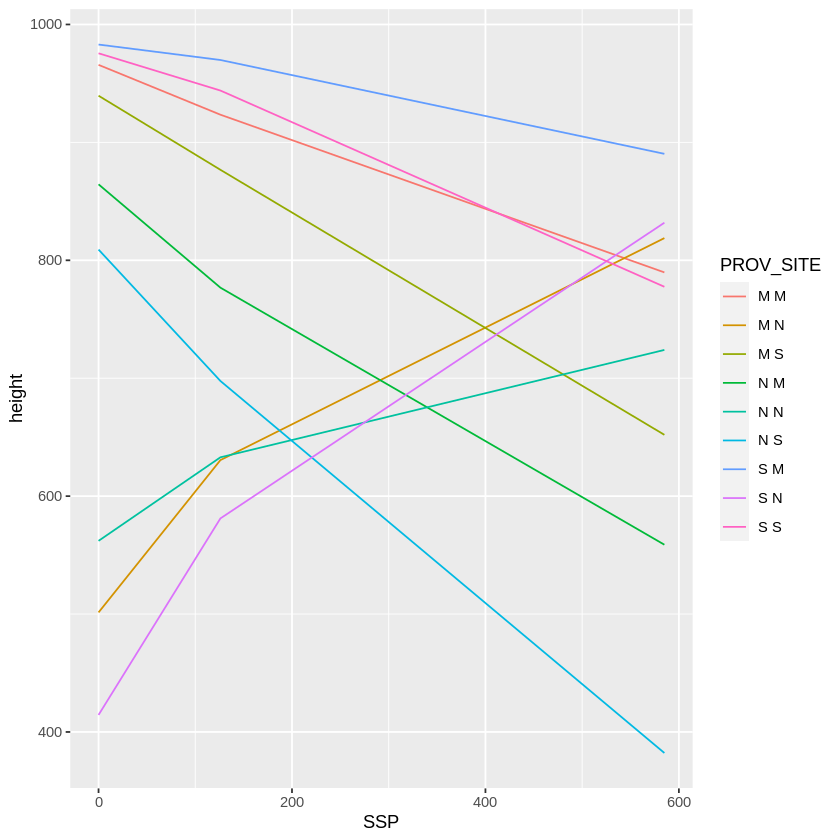

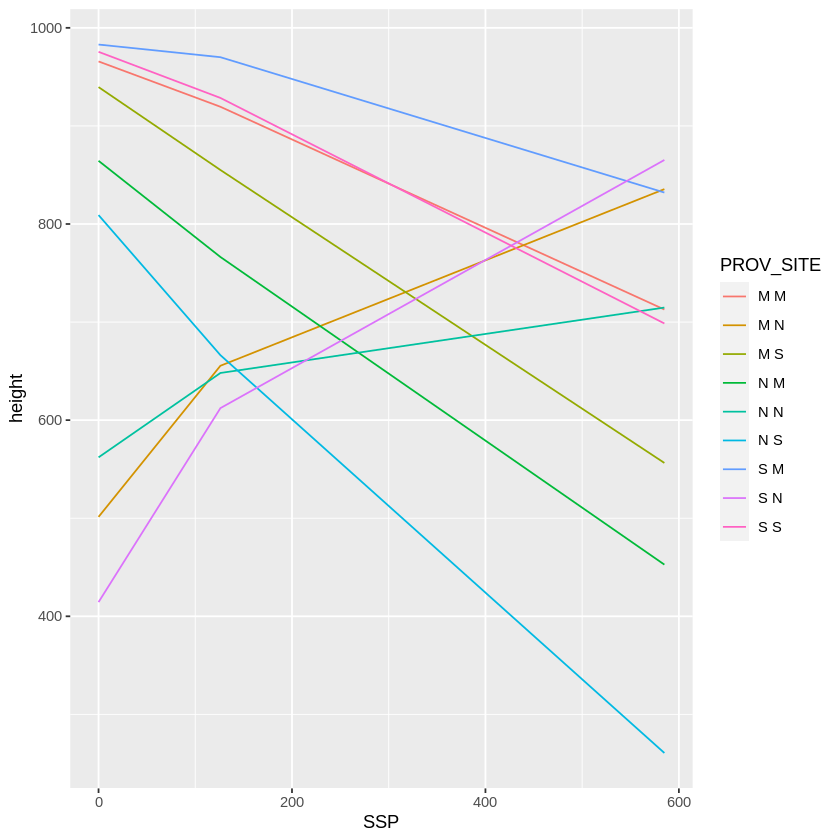

In [96]:
pred_height <- predict(model.8, fcdat2)
pred_table <- tibble (fcdat2$SITE, fcdat2$PROV, fcdat2$SSP, fcdat2$GCM, pred_height) |> 
transmute(SITE = as_factor(fcdat2$SITE),
          PROV = fcdat2$PROV, 
          SSP = fcdat2$SSP, 
          GCM = fcdat2$GCM,
          height = pred_height) |>
mutate(PROV_FCT = factor(PROV,
                        levels = c(34, 40, 63), 
                        labels = c("N", "M", "S")))




pred_table$PROV_SITE <- paste(pred_table$PROV_FCT,pred_table$SITE)


pred_table |> 
filter(GCM == 8) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

pred_table |> 
filter(GCM == 13) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()